# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [97]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [98]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

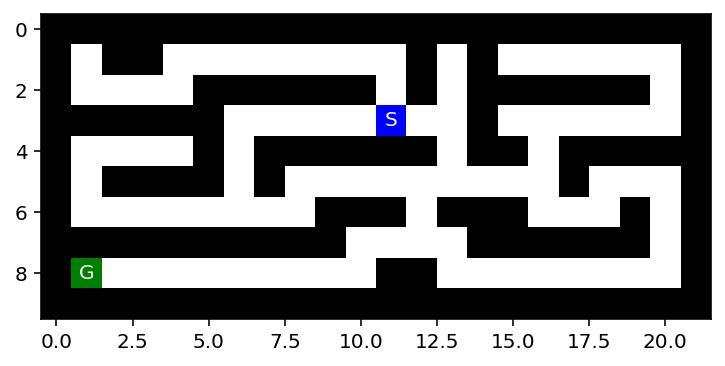

In [99]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

Find the position of the start and the goal using the helper function `find_pos()`

In [100]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    /home/jovyan/CS7320-AI/Search/maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [101]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)
    def getPos(self):
        return self.pos

class HeuristicNode:
    def __init__(self, order, pos, parent, action, cost):
        self.order = order       # Order of node
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)
    def getPos(self):
        return self.pos

    def __lt__(self, other):
        return self.order < other.order


If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

In [36]:
# Initial State
# The initial configuration of the problem, which would be the starting position in the maze, marked "S"

# Actions
# The different possible set of actions {N, E, S, W}

#Transition Model
#Results(S * A) -> S
#If there is an intersection, copy the node for searching purposes and move each node in different directions

#Goal State
#When the agent reaches the goal marked "G"

#Path Cost: the sum of non-negative path costs

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determin these values for a given maze.

In [35]:
# Your answer goes here
# n: The State Space Size should be |x1| * |x*2| * |x*3| ... |x*n|
# d: Depth of optimal solution is the number of actions needed
# m: Depth of tree is the number of actions in any path
# b: the number of max branching factors is the number of successor nodes for a parent

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DSF can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore. 
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

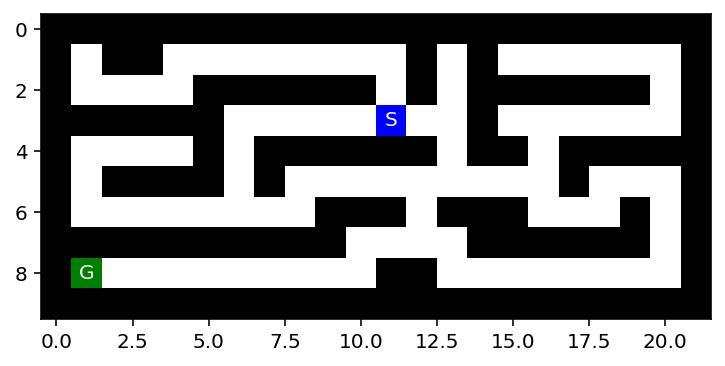

In [102]:
import maze_helper as mh
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(maze)

In [350]:
# Your code goes here
import queue
import sys
import maze_helper as mh
def showmaze(maze):
    %matplotlib inline
    %config InlineBackend.figure_format = 'retina'
    # use higher resolution images in notebook
    mh.show_maze(maze)
    return maze

def BFS (txt):
    global node_expanded
    global depth
    depth = 1
    node_expanded = 1
    #parsing in text for maze
    with open(txt, "r") as f:
        maze_str = f.read()
    maze_now = mh.parse_maze(maze_str)
    #showmaze(maze_now)



    #set node with initial state
    initPos = mh.find_pos(maze_now, what ="S")
    root = Node(initPos, parent = None, action = None, cost = 0)

    #setting the final position goal state
    finalPos = mh.find_pos(maze_now, what ="G")

    #setting Frontier FIFO Queue
    frontier = queue.Queue()
    frontier.put(root)

    #setting Explored Set
    explored = set()
    temp_size = 1
    temp_depth = 1
    loop = 1
    nodes_memory = 1
    temp_explored_size = 0

    while loop == 1:

        if frontier.empty():
            print("Could not find G")
            break
        #finding max frontier size
        maxsize = frontier.qsize()
        if temp_size < maxsize:
            temp_size = maxsize

        #finding max memory size
        maxexplored =  list(set(explored))
        if temp_explored_size < len(maxexplored):
            temp_explored_size = len(maxexplored)


        node = frontier.get()
        #getting node from front of frontier
        #adding nodes to memory


        #finding max node depth
        max_depth = 0
        temp_max_depth = node.get_path_from_root()
        for x in temp_max_depth:
            max_depth += 1
        if temp_depth < max_depth:
            temp_depth = max_depth

        explored.add(node.pos)
        count = count_look(node.pos, maze_now)
        #find how many iterations in for loop
        for x in range(count):
            #childNode actions
            childNode = look(node, node.pos, explored, maze_now)
            node_expanded += 1
            if childNode.pos == finalPos:
                childFinal = []
                path = childNode.get_path_from_root()
                pathCost = -1
                for n in path:
                    pathCost += 1
                childFinal.append(childNode)
                childFinal.append(pathCost)
                childFinal.append(node_expanded)
                childFinal.append(temp_depth)
                childFinal.append(temp_explored_size + temp_size)
                childFinal.append(temp_size)
                childFinal.append(maze_now)
                # print("Nodes Expanded:", node_expanded)
                # print("Tree Depth:", temp_depth)
                # print("Nodes in Memory:", temp_explored_size + temp_size)
                # print("Max Size in Frontier:", temp_size)
                #showmaze(maze_now)
                return childFinal
            frontier.put(childNode)
            maze_now[childNode.pos] = "."
        #show the maze here
        #showmaze(maze_now)

def DFS (txt):
    nodes_memory = 1
    node_expanded = 1

    with open(txt, "r") as f:
        maze_str = f.read()
    maze_now = mh.parse_maze(maze_str)
    #showmaze(maze_now)

    #set node with initial state
    initPos = mh.find_pos(maze_now, what ="S")
    root = Node(initPos, parent = None, action = None, cost = 0)

    #setting the final position goal state
    finalPos = mh.find_pos(maze_now, what ="G")

    result = "Could not find G"
    loop = 1
    frontier = [root]
    temp_size = 1
    while loop == 1:
        if not frontier:
            print("empty")
            break
        maxsize = len(frontier)
        if temp_size < maxsize:
            temp_size = maxsize

        node = frontier.pop()
        nodes_memory += 1
        #looping until frontier is empty
        if node.pos == finalPos:
            return childFinal
        count = count_look(node.pos, maze_now)

        for x in range(count):
            expand_node = expand(node, maze_now)
            frontier.append(expand_node)
            node_expanded += 1
            if expand_node.pos == finalPos:
                childFinal = []
                path = expand_node.get_path_from_root()
                pathCost = -1
                for n in path:
                    pathCost += 1
                childFinal.append(expand_node)
                childFinal.append(pathCost)
                childFinal.append(node_expanded)
                childFinal.append(pathCost)
                childFinal.append(nodes_memory)
                childFinal.append(temp_size)
                childFinal.append(maze_now)
                # print("Nodes Expanded:", node_expanded)
                # print("Nodes in Memory:", nodes_memory)
                # print("Max Size in Frontier:", temp_size)
                #showmaze(maze_now)
                break

            maze_now[expand_node.pos] = "."
            #showmaze(maze_now)
        # SHOW THE MAZE
        #showmaze(maze_now)

    return result


def look(parent_node, looking_node, explored_tuple, maze_look):
    row = looking_node[0]
    column = looking_node[1]
    # print(row)
    # print(column)
    if mh.look(maze_look, (row + 1, column)) == " " or mh.look(maze_look, (row + 1, column)) == "G" \
            and (row + 1, column not in explored_tuple):
        # print("south")
        return Node((row + 1, column), parent = parent_node, action ="S", cost = 1)
    if mh.look(maze_look, (row - 1, column)) == " " or mh.look(maze_look, (row - 1, column)) == "G" \
            and (row - 1, column not in explored_tuple):
        # print("north")
        return Node((row - 1, column), parent = parent_node, action ="N", cost = 1)
    if mh.look(maze_look, (row, column + 1)) == " " or mh.look(maze_look, (row, column + 1)) == "G" \
            and (row, column + 1 not in explored_tuple):
        # print("east")
        return Node((row, column + 1), parent = parent_node, action ="E", cost = 1)
    if mh.look(maze_look, (row, column - 1)) == " " or mh.look(maze_look, (row, column - 1)) == "G" \
            and (row, column - 1 not in explored_tuple):
        # print("west")
        return Node((row, column - 1), parent = parent_node, action ="W", cost = 1)

def lookDFS(parent_node, looking_node, maze_look):
    row = looking_node[0]
    column = looking_node[1]
    if mh.look(maze_look, (row + 1, column)) == " " or mh.look(maze_look, (row + 1, column)) == "G":
        # print("south")
        return Node((row + 1, column), parent = parent_node, action ="S", cost = 1)
    if mh.look(maze_look, (row - 1, column)) == " " or mh.look(maze_look, (row - 1, column)) == "G":
        # print("north")
        return Node((row - 1, column), parent = parent_node, action ="N", cost = 1)
    if mh.look(maze_look, (row, column + 1)) == " " or mh.look(maze_look, (row, column + 1)) == "G":
        # print("east")
        return Node((row, column + 1), parent = parent_node, action ="E", cost = 1)
    if mh.look(maze_look, (row, column - 1)) == " " or mh.look(maze_look, (row, column - 1)) == "G":
        # print("west")
        return Node((row, column - 1), parent = parent_node, action ="W", cost = 1)

def count_look(looking_node, maze_look):
    row_look = looking_node[0]
    column_look = looking_node[1]
    count = 0
    if mh.look(maze_look, (row_look + 1, column_look)) == " " \
            or mh.look(maze_look, (row_look + 1, column_look)) == "G":
        count += 1
    if mh.look(maze_look, (row_look - 1, column_look)) == " " \
            or mh.look(maze_look, (row_look - 1, column_look)) == "G":
        count += 1
    if mh.look(maze_look, (row_look, column_look + 1)) == " " \
            or mh.look(maze_look, (row_look, column_look + 1)) == "G":
        count += 1
    if mh.look(maze_look, (row_look, column_look - 1)) == " " \
            or mh.look(maze_look, (row_look, column_look - 1)) == "G" :
        count += 1
    return count

def expand(s_node, maze_expand):
    s_pos = s_node.pos
    #count = count_look(s_pos, maze_expand)
    #for x in range(count):
    new_node = lookDFS(s_node, s_pos, maze_expand)
    cost = s_node.cost + 1
    return new_node



In [329]:
DFSNode = DFS("open_maze.txt")

# path = DFSNode.get_path_from_root()
#print("References:", path)
#print("Positions:", [n.pos for n in path])
#print("Actions:", [n.action for n in path])
pathCost = -1
# for n in path:
#     pathCost += 1
# print("Tree Depth:", pathCost)
# print("Cost:", pathCost)


In [330]:
finalNode = BFS("small_maze.txt")
# path = finalNode.get_path_from_root()
#print("References:", path)
#print("Positions:", [n.pos for n in path])
#print("Actions:", [n.action for n in path])
#print("Cost:", [n.cost for n in path])
pathCost = -1
# for n in path:
#     pathCost += 1
# print("Cost:", pathCost)



How does BFS and DFS deal with loops (cycles)?


In [38]:
# Discussion
#With BFS and DFS, there should be a cycle checker based off a "reached"
# data structure of some type, that prevents the algorithm to continue going
# and searching a space it has already passed by in. Typically, DFS encounters
# this problem more because it doesn't have a reached structure

Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations?

In [456]:
# Discussion
#BFS is complete and optimal because the cost is the same per step.
# The time and space complexity  is O(b^d)
#DFS is complete in finite spaces but incomplete in infinite spaces because of cycle checking errors.
# It is not optimal because it returns the first solution it finds
#The time complexity would be O(b^m) because the node depth is expanded before the program checks for the goal state.
#The space complexity would be O(b*m) which is limited by the space in the frontier.

## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [352]:
import math
from queue import PriorityQueue
def best_first_search(txt):
    global expanded_node
    global depth
    global nodes_memory
    nodes_memory = 1
    depth = 1
    expanded_node = 1

    #parsing in text for maze
    with open(txt, "r") as f:
        maze_str = f.read()
    maze_now = mh.parse_maze(maze_str)
    #showmaze(maze_now)

    #set node with initial state
    initPos = mh.find_pos(maze_now, what ="S")
    #setting the final position goal state
    finalPos = mh.find_pos(maze_now, what ="G")

    dist = abs(finalPos[0] - initPos[0]) + abs(finalPos[1] - initPos[1])
    #print(dist)
    root = HeuristicNode(dist, initPos, parent = None, action = None, cost = 0)
    frontier = PriorityQueue()
    frontier.put(root)
    #putting root node into frontier

    reached = {root.pos: root}
    loop = 1
    temp_size = 1
    temp_depth = 1
    while loop == 1:
        if frontier.empty():
            print("empty")
            break
        #finding max frontier size
        maxsize = frontier.qsize()
        if temp_size < maxsize:
            temp_size = maxsize


        node = frontier.get()
        if node.pos == finalPos:
                return node

        #finding max node depth
        max_depth = 1
        temp_max_depth = node.get_path_from_root()
        for x in temp_max_depth:
            max_depth += 1
        if temp_depth < max_depth:
            temp_depth = max_depth

        count = count_look(node.pos, maze_now)
        for x in range(count):
            child_node = expand(node, maze_now)

            nodes_memory += 1

            child_distance = distanceFinder(child_node.pos, finalPos)
            child_pos = child_node.pos
            if child_node.pos == finalPos:
                #showmaze(maze_now)
                childFinal = []
                path = child_node.get_path_from_root()
                pathCost = -1
                for n in path:
                    pathCost += 1
                childFinal.append(child_node)
                childFinal.append(pathCost)
                childFinal.append(node_expanded)
                childFinal.append(temp_depth)
                childFinal.append(nodes_memory)
                childFinal.append(temp_size)
                childFinal.append(maze_now)
                # print("Nodes Expanded:", expanded_node)
                # print("Tree Depth:", temp_depth)
                # print("Nodes in Memory:", nodes_memory)
                # print("Max Size in Frontier:", temp_size)
                return childFinal
            if child_node.pos not in reached or (child_distance <= reached[child_pos].order):
                #print(reached[child_pos])
                reached[child_pos] = child_node
                #add 1 to Expanded Node
                expanded_node += 1
                frontier.put(child_node)
                maze_now[child_node.pos] = "."

        # SHOW MAZE
        #showmaze(maze_now)

    return print("failure")

def A_star_search(txt):
    global node_expanded
    global nodes_memory
    nodes_memory = 1
    node_expanded = 1

    #parsing in text for maze
    with open(txt, "r") as f:
        maze_str = f.read()
    maze_now = mh.parse_maze(maze_str)
    #showmaze(maze_now)

    #set node with initial state
    initPos = mh.find_pos(maze_now, what ="S")
    #setting the final position goal state
    finalPos = mh.find_pos(maze_now, what ="G")

    dist = abs(finalPos[0] - initPos[0]) + abs(finalPos[1] - initPos[1])
    #print(dist)
    root = HeuristicNode(dist, initPos, parent = None, action = None, cost = 0)
    frontier = PriorityQueue()
    frontier.put(root)
    #putting root node into frontier

    reached = {root.pos: root}
    loop = 1
    temp_size = 1
    temp_depth = 1

    while loop == 1:

        #finding max frontier size
        maxsize = frontier.qsize()
        if temp_size < maxsize:
            temp_size = maxsize


        if frontier.empty():
            print("empty")
            break

        node = frontier.get()


        if node.pos == finalPos:
                return node
        count = count_look(node.pos, maze_now)
        for x in range(count):
            child_node = expand_a_star(node, maze_now)

            #finding max node depth
            max_depth = 1
            temp_max_depth = child_node.get_path_from_root()
            for j in temp_max_depth:
                max_depth += 1
            if temp_depth < max_depth:
                temp_depth = max_depth

            #add to nodes memory
            nodes_memory += 1
            child_distance = distanceFinder(child_node.pos, finalPos)
            child_pos = child_node.pos

            if child_node.pos == finalPos:
                childFinal = []
                path = child_node.get_path_from_root()
                pathCost = -1
                for n in path:
                    pathCost += 1
                childFinal.append(child_node)
                childFinal.append(pathCost)
                childFinal.append(node_expanded)
                childFinal.append(temp_depth)
                childFinal.append(nodes_memory)
                childFinal.append(temp_size)
                childFinal.append(maze_now)
                # print("Nodes Expanded:", node_expanded)
                # print("Tree Depth:", temp_depth)
                # print("Nodes in Memory:", nodes_memory)
                # print("Max Size in Frontier:", temp_size)
                #showmaze(maze_now)
                return childFinal
            if child_node.pos not in reached or (child_distance <= reached[child_pos].order):
                #print(reached[child_pos])
                reached[child_pos] = child_node
                frontier.put(child_node)
                #Add to Node Expanded
                node_expanded += 1
                maze_now[child_node.pos] = "."

        # SHOW MAZE
        #showmaze(maze_now)

    return print("failure")

def distanceFinder(initialPosition, finalPosition):
    return abs(finalPosition[0] - initialPosition[0]) + abs(finalPosition[1] - initialPosition[1])

def look_best(parent_node, looking_node, maze_look):
    row = looking_node[0]
    column = looking_node[1]
    finalPos = mh.find_pos(maze_look, what ="G")

    if mh.look(maze_look, (row + 1, column)) == " " or mh.look(maze_look, (row + 1, column)) == "G":
        # print("south")
        new_coord = (row + 1, column)
        dist = distanceFinder(new_coord, finalPos)
        return HeuristicNode(dist, (row + 1, column), parent = parent_node,
                             action ="S", cost = 1 + parent_node.cost)
    if mh.look(maze_look, (row - 1, column)) == " " or mh.look(maze_look, (row - 1, column)) == "G":
        # print("north")
        new_coord = (row - 1, column)
        dist = distanceFinder(new_coord, finalPos)
        return HeuristicNode(dist, (row - 1, column), parent = parent_node,
                             action ="N", cost = 1 + parent_node.cost)
    if mh.look(maze_look, (row, column + 1)) == " " or mh.look(maze_look, (row, column + 1)) == "G":
        # print("east")
        new_coord = (row, column + 1)
        dist = distanceFinder(new_coord, finalPos)
        return HeuristicNode(dist, (row, column + 1), parent = parent_node,
                             action ="E", cost = 1 + parent_node.cost)
    if mh.look(maze_look, (row, column - 1)) == " " or mh.look(maze_look, (row, column - 1)) == "G":
        # print("west")
        new_coord = (row, column - 1)
        dist = distanceFinder(new_coord, finalPos)
        return HeuristicNode(dist, (row, column - 1), parent = parent_node,
                             action ="W", cost = 1 + parent_node.cost)

def look_A_star(parent_node, looking_node, maze_look):
    row = looking_node[0]
    column = looking_node[1]
    finalPos = mh.find_pos(maze_look, what ="G")

    if mh.look(maze_look, (row + 1, column)) == " " or mh.look(maze_look, (row + 1, column)) == "G":
        # print("south")
        new_coord = (row + 1, column)
        dist = distanceFinder(new_coord, finalPos)
        return HeuristicNode(dist + parent_node.cost, (row + 1, column),
                             parent = parent_node, action ="S", cost = 1 + parent_node.cost)
    if mh.look(maze_look, (row - 1, column)) == " " or mh.look(maze_look, (row - 1, column)) == "G":
        # print("north")
        new_coord = (row - 1, column)
        dist = distanceFinder(new_coord, finalPos)
        return HeuristicNode(dist + parent_node.cost, (row - 1, column),
                             parent = parent_node, action ="N", cost = 1 + parent_node.cost)
    if mh.look(maze_look, (row, column + 1)) == " " or mh.look(maze_look, (row, column + 1)) == "G":
        # print("east")
        new_coord = (row, column + 1)
        dist = distanceFinder(new_coord, finalPos)
        return HeuristicNode(dist + parent_node.cost, (row, column + 1),
                             parent = parent_node, action ="E", cost = 1 + parent_node.cost)
    if mh.look(maze_look, (row, column - 1)) == " " or mh.look(maze_look, (row, column - 1)) == "G":
        # print("west")
        new_coord = (row, column - 1)
        dist = distanceFinder(new_coord, finalPos)
        return HeuristicNode(dist + parent_node.cost, (row, column - 1),
                             parent = parent_node, action ="W", cost = 1 + parent_node.cost)

def count_nodes(looking_node, maze_look):
    row_look = looking_node[0]
    column_look = looking_node[1]
    count = 0
    if mh.look(maze_look, (row_look + 1, column_look)) == " " or \
            mh.look(maze_look, (row_look + 1, column_look)) == "G":
        count += 1
    if mh.look(maze_look, (row_look - 1, column_look)) == " " or \
            mh.look(maze_look, (row_look - 1, column_look)) == "G":
        count += 1
    if mh.look(maze_look, (row_look, column_look + 1)) == " " or \
            mh.look(maze_look, (row_look, column_look + 1)) == "G":
        count += 1
    if mh.look(maze_look, (row_look, column_look - 1)) == " " or \
            mh.look(maze_look, (row_look, column_look - 1)) == "G" :
        count += 1
    return count

def expand(s_node, maze_expand):
    s_pos = s_node.pos
    #count = count_look(s_pos, maze_expand)
    #for x in range(count):
    new_node = look_best(s_node, s_pos, maze_expand)
    cost = s_node.cost + 1
    return new_node

def expand_a_star(s_node, maze_expand):
    s_pos = s_node.pos
    #count = count_look(s_pos, maze_expand)
    #for x in range(count):
    new_node = look_A_star(s_node, s_pos, maze_expand)
    cost = s_node.cost + 1
    return new_node



In [439]:
finalNode = A_star_search("small_maze.txt")
# for x in range(len(finalNode)):
#     j = finalNode.pop()
#     print(j)
# path = finalNode[0].get_path_from_root()
#print("References:", path)
# print("Positions:", [n.pos for n in path])
# print("Actions:", [n.action for n in path])
#print("Cost:", [n.cost for n in path])
# pathCost = 0
# for n in path:
#     pathCost += 1
# print("Path Cost:", pathCost)

In [327]:
finalNode = best_first_search("open_maze.txt")
# path = finalNode[0].get_path_from_root()
# print("References:", path)
# print("Positions:", [n.pos for n in path])
# print("Actions:", [n.action for n in path])
#print("Cost:", [n.cost for n in path])
# pathCost = 0
# for n in path:
#     pathCost += 1
# print("Cost:", pathCost)

Are your implementations complete and optimal? What is the time and space complexity?

In [455]:
# Discussion
#Greedy best first is complete but not optimal
#Its time and space complexity is worst case: O(b^m) and best case O(b*d)

#A* is complete and optimal
# Its time and space complexity is the number of nodes for which 𝑓(𝑛) ≤ 𝐶*

## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [453]:
# My main issues weren't with the actual implementation of the algorithms but the
# data analytics and figuring out which nodes were being expanded or if the nodes in memory
# should match the nodes being expanded number. This also occured with the depth of the tree
# and the path cost being very similar or the same. While I am sure there may be some overlaps,
# I feel like the numbers should be different in some areas. However, this may have come with
# the implementation of my algorithms and with the error checking of the explored and reach structures with
# the frontier structure as well.

In [460]:
# importing the modules
from IPython.display import display
import pandas as pd


def displayData(txt):
    finalNode = BFS(txt)

    DFSNode = DFS(txt)

    fNode = best_first_search(txt)

    mNode = A_star_search(txt)

    data = {'Algorithm' : ['BFS', 'DFS', 'GBS', 'A*'],
            'path cost' : [finalNode[1], DFSNode[1], fNode[1], mNode[1]],
            '# of nodes expanded' : [finalNode[2], DFSNode[2], fNode[2], mNode[2]],
            'max tree depth' : [finalNode[3], DFSNode[3], fNode[3], mNode[3]],
            'max # of nodes in memory' : [finalNode[4], DFSNode[4], fNode[4], mNode[4]],
            'max frontier size' : [finalNode[5], DFSNode[5], fNode[5], mNode[5]]
            }

    df = pd.DataFrame(data)
    df.set_index('Algorithm', inplace=True)
    df
    # displaying the DataFrame
    display(df)
    print("BFS\n")
    showmaze(printFinalPath(finalNode[0], finalNode[6]))
    print("DFS\n")
    showmaze(printFinalPath(DFSNode[0], DFSNode[6]))
    print("GBS\n")
    showmaze(printFinalPath(fNode[0], fNode[6]))
    print("A*\n")
    showmaze(printFinalPath(mNode[0], mNode[6]))

def printFinalPath(final_path, maze):
    path = final_path.get_path_from_root()
    for i in path:
        (x,y) = i.pos
        if(mh.look(maze, (x,y))!= 'G'):
            if(mh.look(maze, (x,y))!= 'S'):
                maze[x,y] = 'P'
    return maze

small_maze.txt



,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
Algorithm,,,,,
BFS,19,93,19,98,9
DFS,49,78,49,74,7
GBS,29,93,30,44,5
A*,19,58,21,59,8


BFS



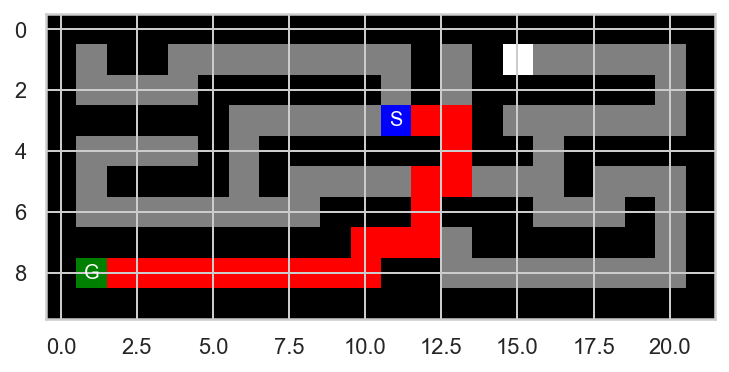

DFS



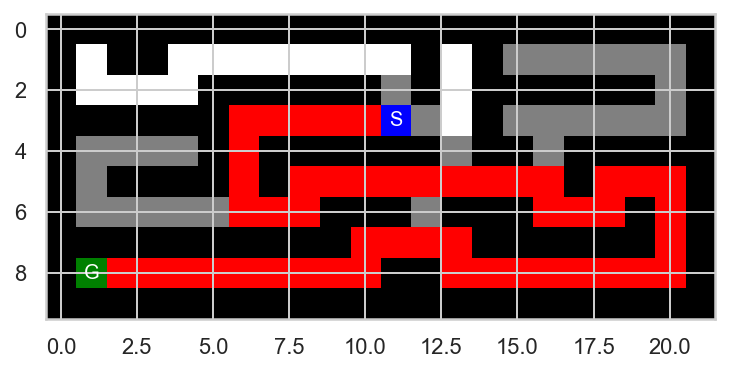

GBS



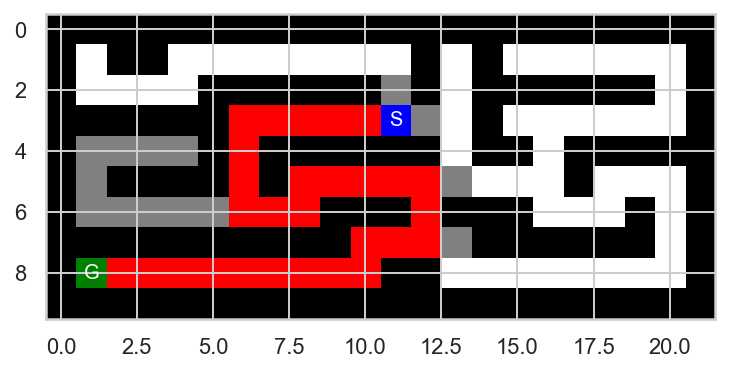

A*



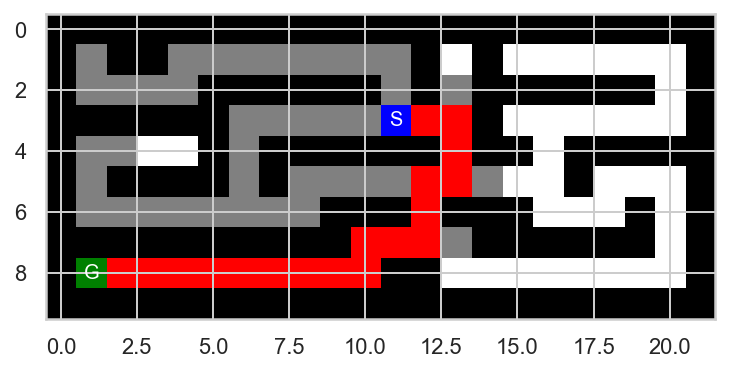

medium_maze.txt



,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
Algorithm,,,,,
BFS,68,270,68,274,8
DFS,130,153,130,145,9
GBS,74,270,75,82,4
A*,68,227,70,228,8


BFS



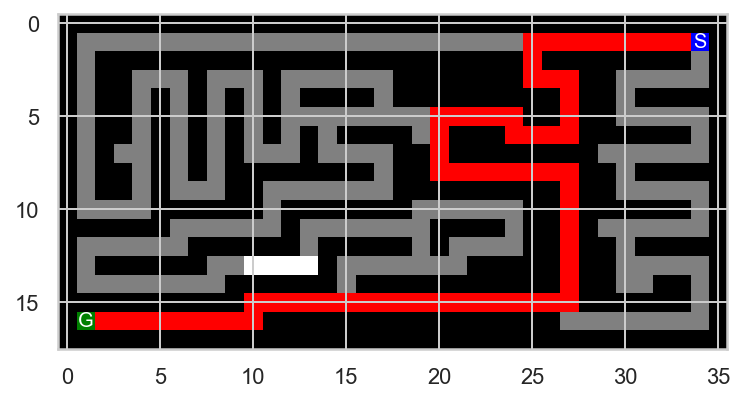

DFS



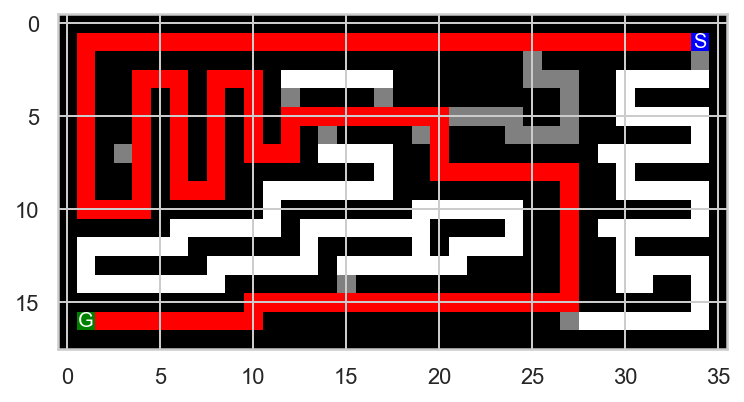

GBS



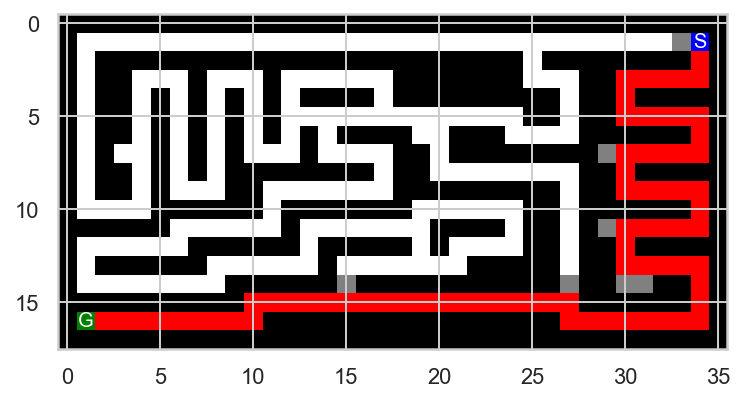

A*



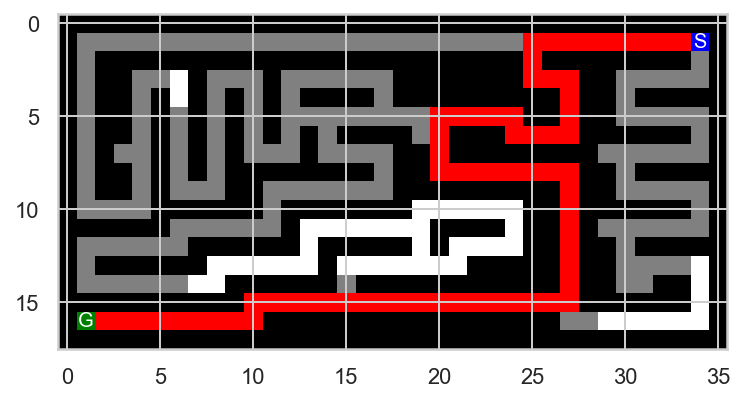

large_maze.txt



,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
Algorithm,,,,,
BFS,210,620,210,623,8
DFS,210,462,210,427,37
GBS,210,620,211,485,22
A*,210,556,212,557,13


BFS



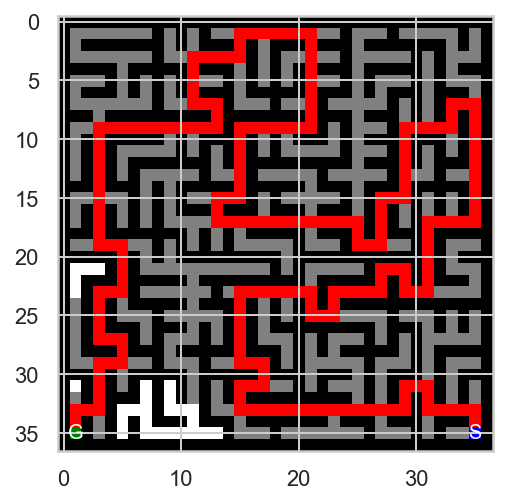

DFS



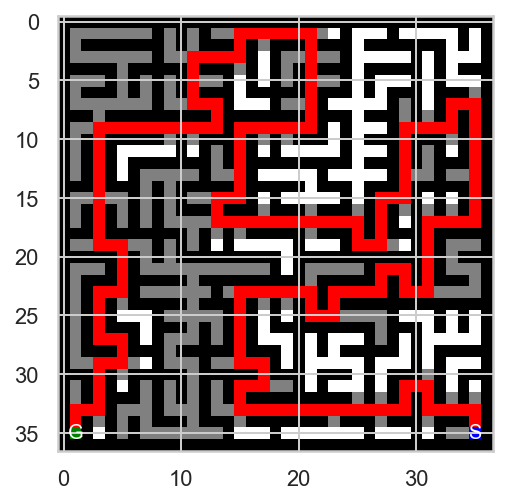

GBS



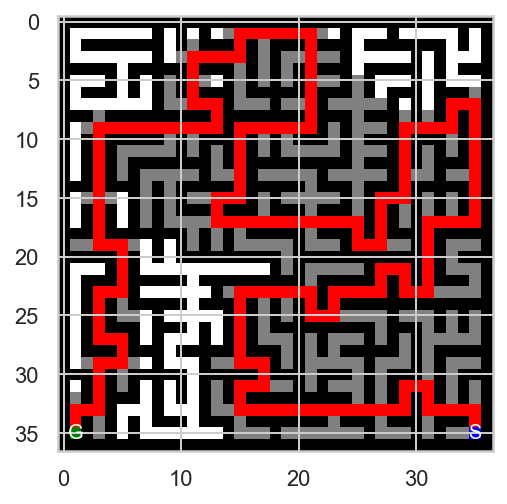

A*



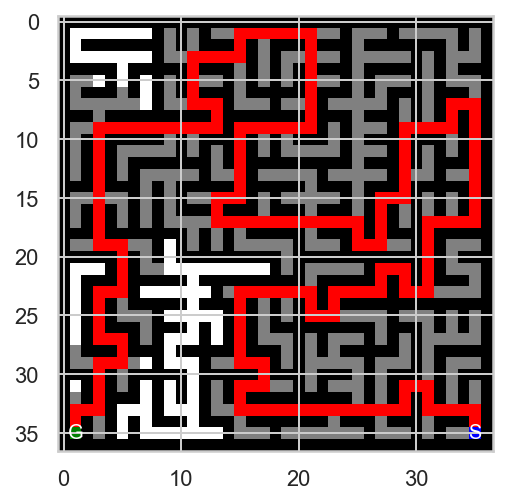

wall_maze.txt



,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
Algorithm,,,,,
BFS,14,89,14,95,11
DFS,26,52,26,27,25
GBS,14,89,15,43,27
A*,14,69,16,70,27


BFS



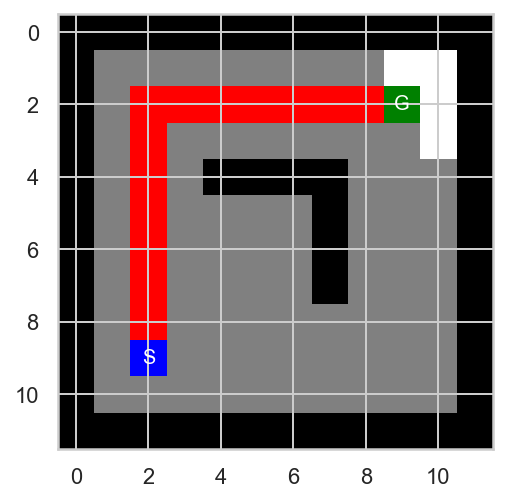

DFS



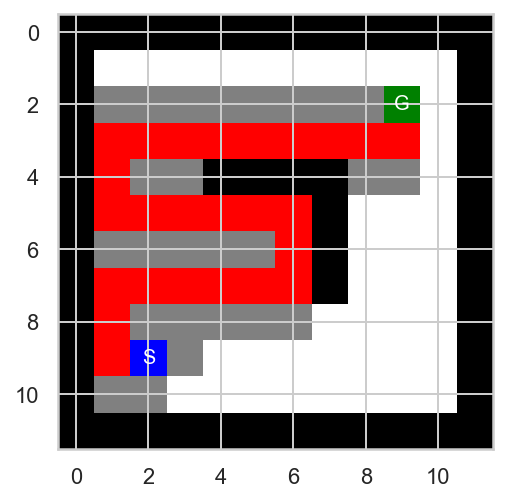

GBS



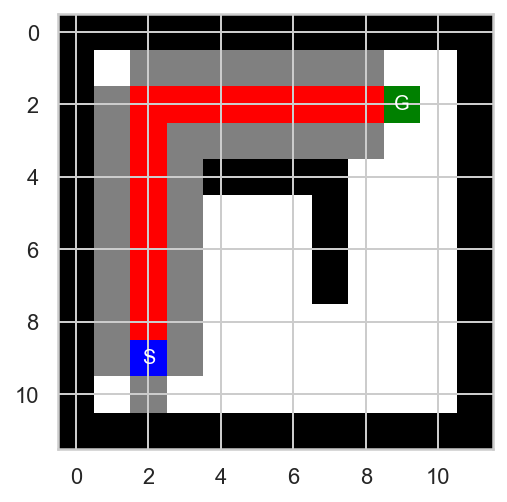

A*



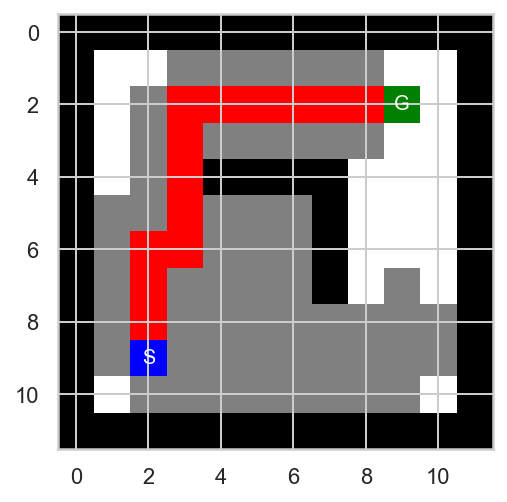

loops_maze.txt



,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
Algorithm,,,,,
BFS,23,72,23,77,8
DFS,27,40,27,28,13
GBS,23,72,24,61,9
A*,23,61,25,62,7


BFS



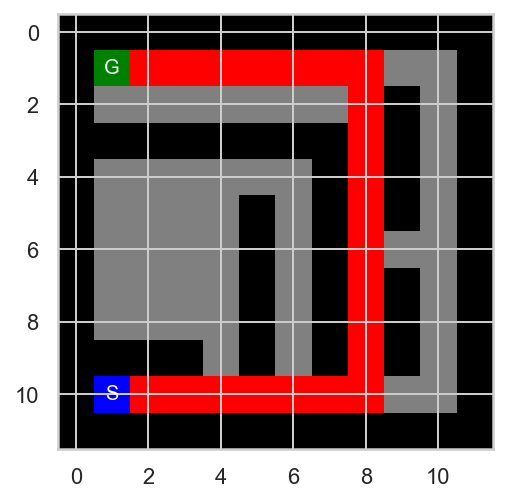

DFS



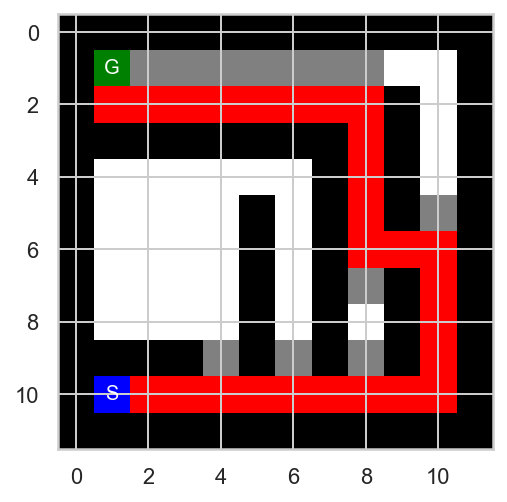

GBS



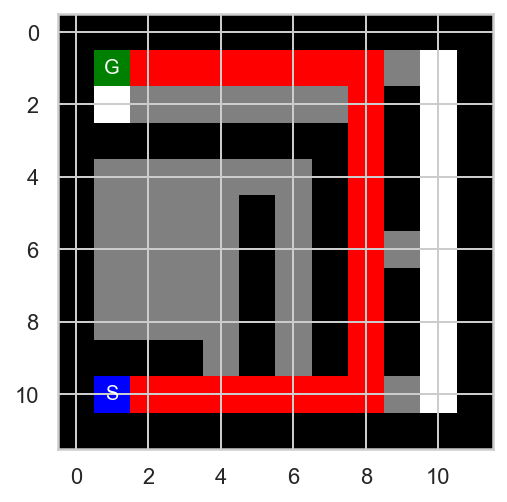

A*



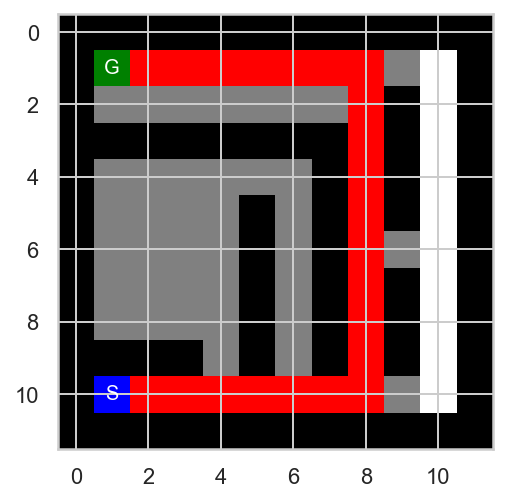

empty_maze.txt



,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
Algorithm,,,,,
BFS,14,96,14,103,12
DFS,34,73,34,35,39
GBS,14,96,15,43,27
A*,14,66,16,67,31


BFS



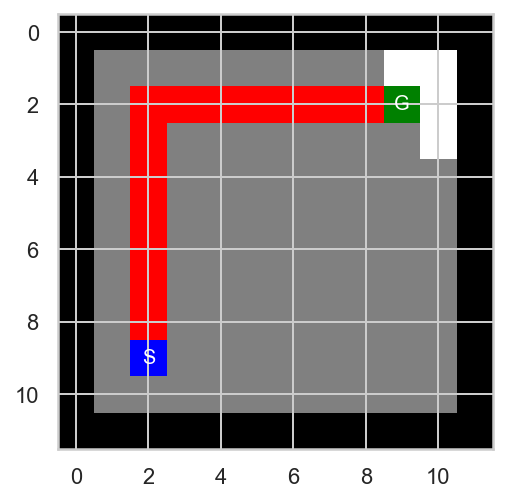

DFS



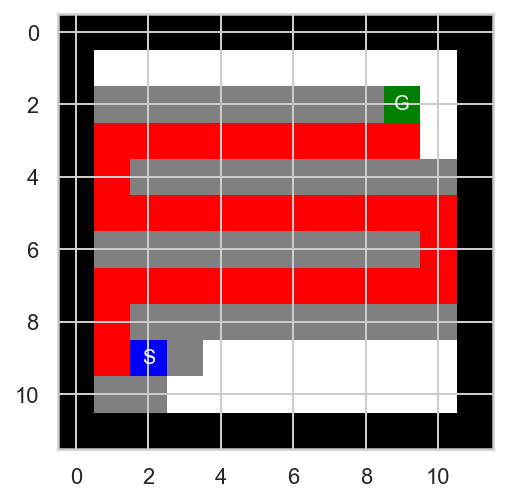

GBS



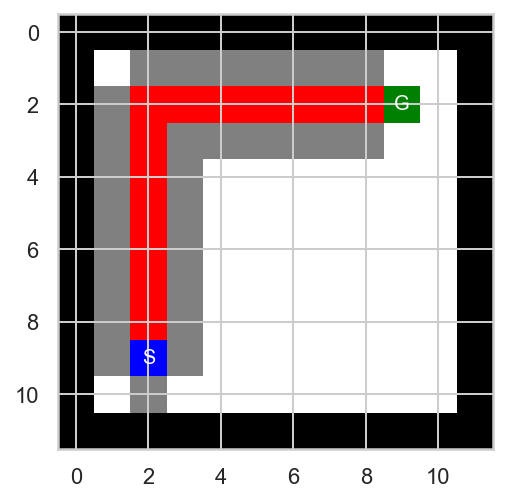

A*



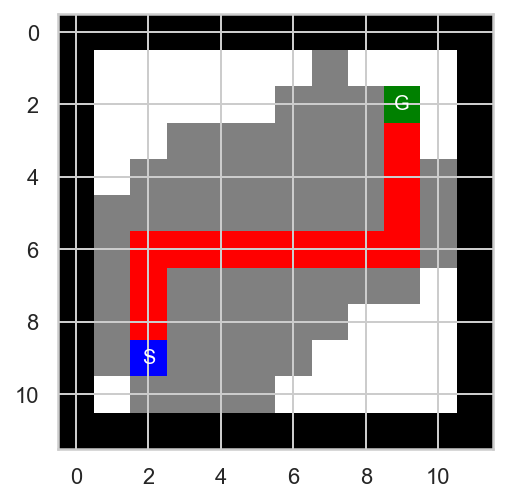

empty_2_maze.txt



,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
Algorithm,,,,,
BFS,14,96,14,103,12
DFS,34,73,34,37,37
GBS,14,96,15,43,27
A*,14,67,16,68,34


BFS



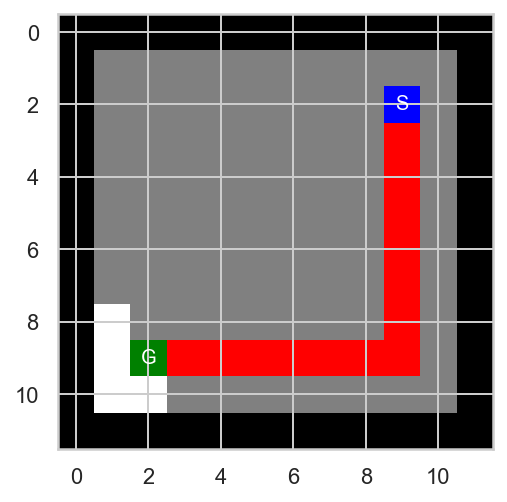

DFS



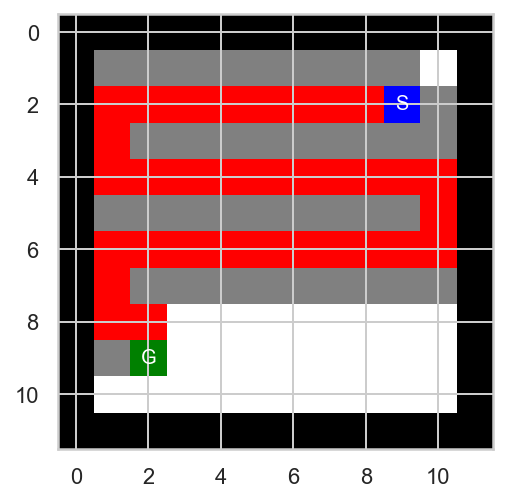

GBS



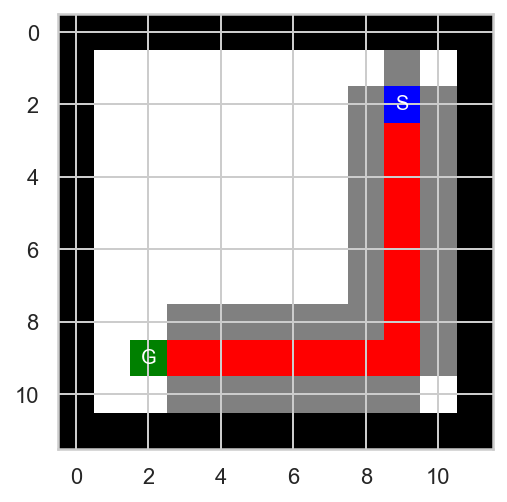

A*



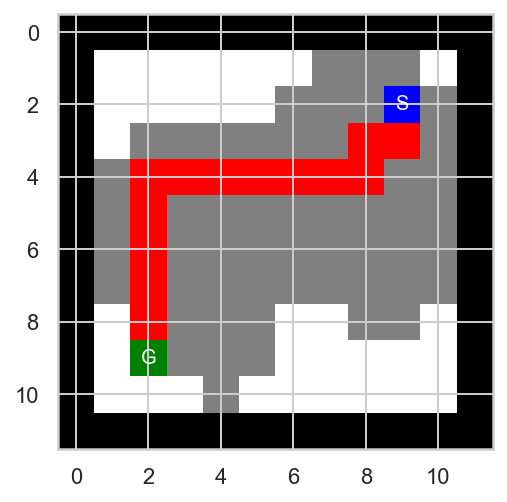

open_maze.txt



,path cost,# of nodes expanded,max tree depth,max # of nodes in memory,max frontier size
Algorithm,,,,,
BFS,54,683,54,703,25
DFS,158,490,158,341,162
GBS,68,683,69,155,65
A*,54,332,56,333,101


BFS



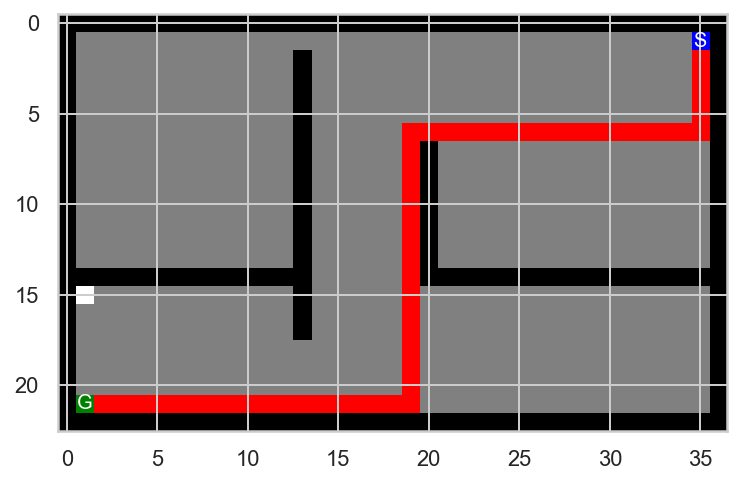

DFS



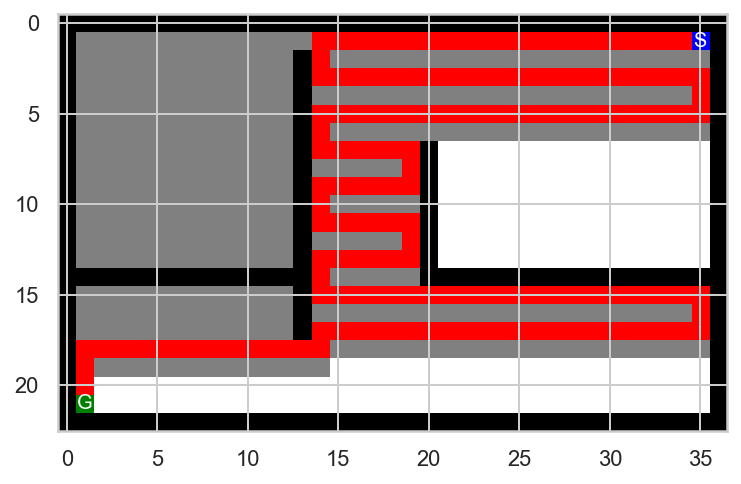

GBS



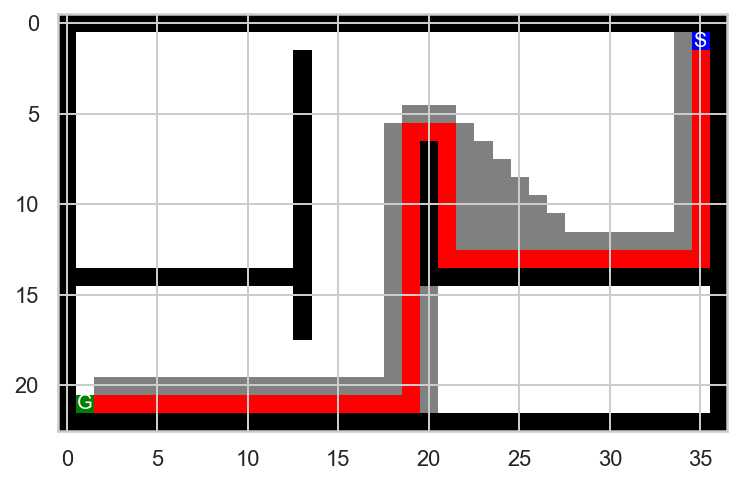

A*



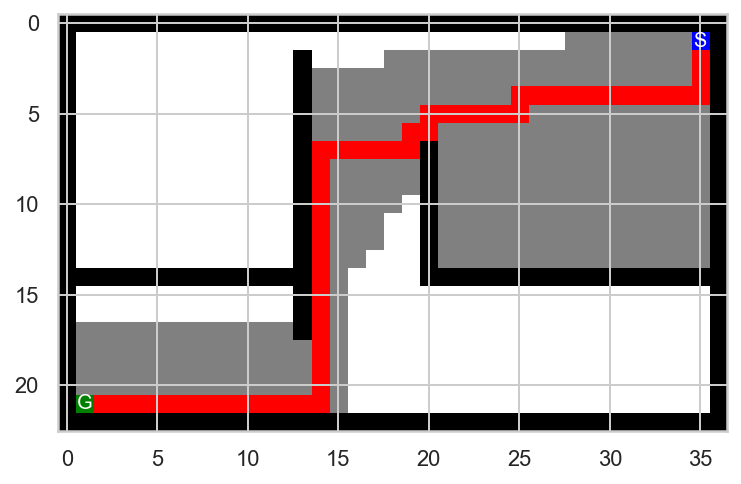

In [461]:
print("small_maze.txt\n")
displayData("small_maze.txt")
print("medium_maze.txt\n")
displayData("medium_maze.txt")
print("large_maze.txt\n")
displayData("large_maze.txt")
print("wall_maze.txt\n")
displayData("wall_maze.txt")
print("loops_maze.txt\n")
displayData("loops_maze.txt")
print("empty_maze.txt\n")
displayData("empty_maze.txt")
print("empty_2_maze.txt\n")
displayData("empty_2_maze.txt")
print("open_maze.txt\n")
displayData("open_maze.txt")


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

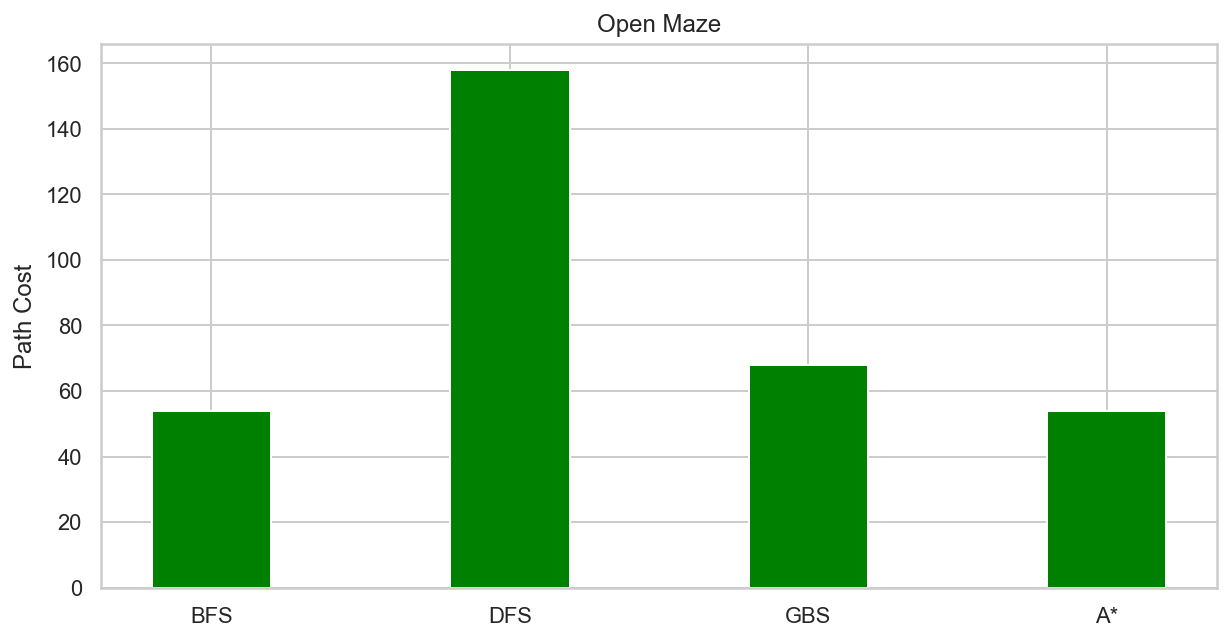

In [401]:
# Add charts
import matplotlib.pyplot as plt
import seaborn as sns

data = {"BFS" : 54, "DFS" : 158, "GBS": 68, "A*": 54}
keys = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(keys, values, color ='green',
        width = 0.4)


plt.ylabel("Path Cost")
plt.title("Open Maze")
plt.show()

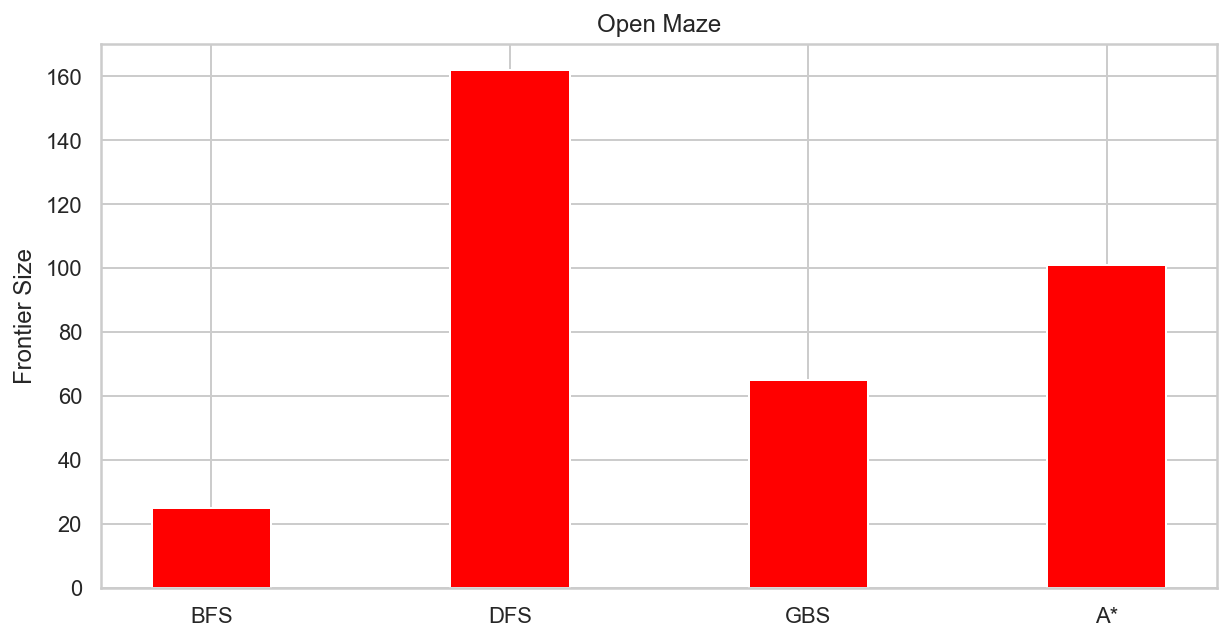

In [407]:
data = {"BFS" : 25, "DFS" : 162, "GBS": 65, "A*": 101}
keys = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(keys, values, color ='red',
        width = 0.4)


plt.ylabel("Frontier Size")
plt.title("Open Maze")
plt.show()

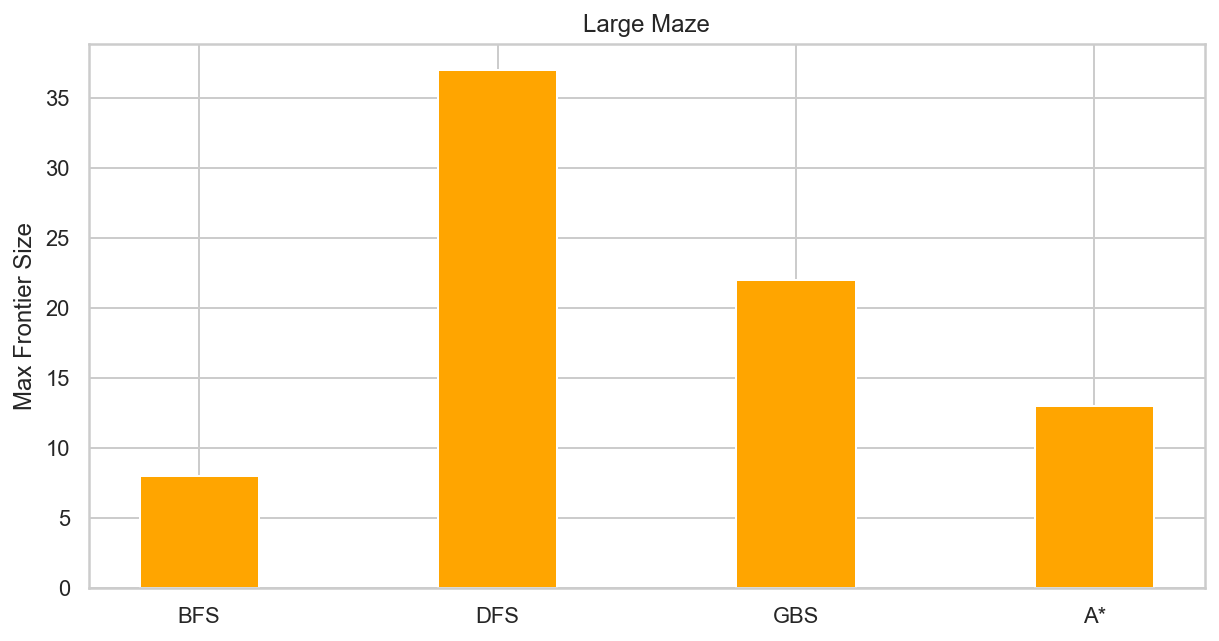

In [408]:
data = {"BFS" : 8, "DFS" : 37, "GBS": 22, "A*": 13}
keys = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

plt.bar(keys, values, color ='orange',
        width = 0.4)


plt.ylabel("Max Frontier Size")
plt.title("Large Maze")
plt.show()

Discuss the most important lessons you have learned from implementing the different search strategies. 

In [17]:
# Add discussion
# One of the most important lessons I learned was that planning out my code with pseudocode
# was really helpful in completing the actual coding of the program quickly and effectively.
# Once I was able to understand how the pseudocode worked, I was able to implement the code quickly.

## Graduate student advanced task: Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [ ]:
# BFS finds the optimal solution while DFS and IDS do not. This may be because DFS and IDS
# simply look for the solution as fast as possible without exploring as many other nodes, and
# while it may return a function faster, it doesn't produce the optimal path. This is
# contrasted with BFS which searches all the nodes and returns the shortest path possible.
# I am not completely sure why the two solutions are different with different goals marked
# as "F" which means that the BFS wasn't optimal for one of the solutions. However, its
# success rate for optimality is higher than DFS and IDS.

In [481]:
# Your code goes here
def BFSBonus (txt):
    global node_expanded
    global depth
    depth = 1
    node_expanded = 1
    #parsing in text for maze
    with open(txt, "r") as f:
        maze_str = f.read()
    maze_now = mh.parse_maze(maze_str)
    #showmaze(maze_now)



    #set node with initial state
    initPos = mh.find_pos(maze_now, what ="S")
    root = Node(initPos, parent = None, action = None, cost = 0)

    #setting the final position goal state
    finalPos = mh.find_pos(maze_now, what ="G")
    finalPos2 = mh.find_pos(maze_now, what ="F")



    #setting Frontier FIFO Queue
    frontier = queue.Queue()
    frontier.put(root)

    #setting Explored Set
    explored = set()
    temp_size = 1
    temp_depth = 1
    loop = 1
    nodes_memory = 1
    temp_explored_size = 0

    while loop == 1:

        if frontier.empty():
            print("Could not find G")
            break
        #finding max frontier size
        maxsize = frontier.qsize()
        if temp_size < maxsize:
            temp_size = maxsize

        #finding max memory size
        maxexplored =  list(set(explored))
        if temp_explored_size < len(maxexplored):
            temp_explored_size = len(maxexplored)


        node = frontier.get()
        #getting node from front of frontier
        #adding nodes to memory


        #finding max node depth
        max_depth = 0
        temp_max_depth = node.get_path_from_root()
        for x in temp_max_depth:
            max_depth += 1
        if temp_depth < max_depth:
            temp_depth = max_depth

        explored.add(node.pos)
        count = count_lookBonus(node.pos, maze_now)
        #find how many iterations in for loop
        for x in range(count):
            #childNode actions
            childNode = lookBonus(node, node.pos, explored, maze_now)
            node_expanded += 1
            if childNode.pos == finalPos or childNode.pos ==  finalPos2:
                childFinal = []
                path = childNode.get_path_from_root()
                pathCost = -1
                for n in path:
                    pathCost += 1
                childFinal.append(childNode)
                childFinal.append(pathCost)
                childFinal.append(node_expanded)
                childFinal.append(temp_depth)
                childFinal.append(temp_explored_size + temp_size)
                childFinal.append(temp_size)
                childFinal.append(maze_now)
                # print("Nodes Expanded:", node_expanded)
                # print("Tree Depth:", temp_depth)
                # print("Nodes in Memory:", temp_explored_size + temp_size)
                # print("Max Size in Frontier:", temp_size)
                #showmaze(maze_now)
                return childFinal
            frontier.put(childNode)
            maze_now[childNode.pos] = "."
        #show the maze here
        #showmaze(maze_now)

def DFSBonus(txt):
    nodes_memory = 1
    node_expanded = 1

    with open(txt, "r") as f:
        maze_str = f.read()
    maze_now = mh.parse_maze(maze_str)
    #showmaze(maze_now)

    #set node with initial state
    initPos = mh.find_pos(maze_now, what ="S")
    root = Node(initPos, parent = None, action = None, cost = 0)

    #setting the final position goal state
    finalPos = mh.find_pos(maze_now, what ="G")

    finalPos2 = mh.find_pos(maze_now, what ="F")

    result = "Could not find G"
    loop = 1
    frontier = [root]
    temp_size = 1
    while loop == 1:
        if not frontier:
            print("empty")
            break
        maxsize = len(frontier)
        if temp_size < maxsize:
            temp_size = maxsize

        node = frontier.pop()
        nodes_memory += 1
        #looping until frontier is empty
        if node.pos == finalPos or node.pos == finalPos2:
            return childFinal
        count = count_lookBonus(node.pos, maze_now)

        for x in range(count):
            expand_node = expand(node, maze_now)
            frontier.append(expand_node)
            node_expanded += 1
            if expand_node.pos == finalPos or expand_node.pos == finalPos2:
                childFinal = []
                path = expand_node.get_path_from_root()
                pathCost = -1
                for n in path:
                    pathCost += 1
                childFinal.append(expand_node)
                childFinal.append(pathCost)
                childFinal.append(node_expanded)
                childFinal.append(pathCost)
                childFinal.append(nodes_memory)
                childFinal.append(temp_size)
                childFinal.append(maze_now)
                # print("Nodes Expanded:", node_expanded)
                # print("Nodes in Memory:", nodes_memory)
                # print("Max Size in Frontier:", temp_size)
                #showmaze(maze_now)
                break

            maze_now[expand_node.pos] = "."
            #showmaze(maze_now)
        # SHOW THE MAZE
        #showmaze(maze_now)

def IDS(txt):
    with open(txt, "r") as f:
        maze_str = f.read()
    maze_now = mh.parse_maze(maze_str)
    #showmaze(maze_now)
    for limit in range(10000):
        result = IDSBonus(maze_now, limit)
        if result != "cutoff":
            return result

def IDSBonus(maze_now, limit):
    nodes_memory = 0
    node_expanded = 0
    #set node with initial state
    initPos = mh.find_pos(maze_now, what ="S")
    root = Node(initPos, parent = None, action = None, cost = 0)

    #setting the final position goal state
    finalPos = mh.find_pos(maze_now, what ="G")

    finalPos2 = mh.find_pos(maze_now, what ="F")

    result = "Could not find G"
    loop = 1
    frontier = [root]
    temp_size = 1
    while loop == 1:
        if not frontier:
            print("empty")
            break
        maxsize = len(frontier)
        if temp_size < maxsize:
            temp_size = maxsize

        node = frontier.pop()
        nodes_memory += 1
        #looping until frontier is empty
        if node.pos == finalPos or node.pos == finalPos2:
            childFinal = []
            childFinal.append(expand_node)
            childFinal.append(pathCost)
            childFinal.append(node_expanded)
            childFinal.append(pathCost)
            childFinal.append(nodes_memory)
            childFinal.append(temp_size)
            childFinal.append(maze_now)
            return childFinal

        count = count_lookBonus(node.pos, maze_now)

        path = node.get_path_from_root()
        pathCost = 1
        for n in path:
            pathCost += 1
        if pathCost > limit:
            result = "cutoff"


        for x in range(count):
            expand_node = expand(node, maze_now)
            frontier.append(expand_node)
            node_expanded += 1
            if expand_node.pos == finalPos or expand_node.pos == finalPos2:
                childFinal = []
                childFinal.append(expand_node)
                childFinal.append(pathCost)
                childFinal.append(node_expanded)
                childFinal.append(pathCost)
                childFinal.append(nodes_memory)
                childFinal.append(temp_size)
                childFinal.append(maze_now)
                # print("Nodes Expanded:", node_expanded)
                # print("Nodes in Memory:", nodes_memory)
                # print("Max Size in Frontier:", temp_size)
                #showmaze(maze_now)
                break

            maze_now[expand_node.pos] = "."
            #showmaze(maze_now)
        # SHOW THE MAZE
        #showmaze(maze_now)

    return result


def lookBonus(parent_node, looking_node, explored_tuple, maze_look):
    row = looking_node[0]
    column = looking_node[1]
    # print(row)
    # print(column)
    if mh.look(maze_look, (row + 1, column)) == " " or mh.look(maze_look, (row + 1, column)) == "G" \
            or mh.look(maze_look, (row, column - 1)) == "F"\
            and (row + 1, column not in explored_tuple):
        # print("south")
        return Node((row + 1, column), parent = parent_node, action ="S", cost = 1)
    if mh.look(maze_look, (row - 1, column)) == " " or mh.look(maze_look, (row - 1, column)) == "G" \
            or mh.look(maze_look, (row, column - 1)) == "F"\
            and (row - 1, column not in explored_tuple):
        # print("north")
        return Node((row - 1, column), parent = parent_node, action ="N", cost = 1)
    if mh.look(maze_look, (row, column + 1)) == " " or mh.look(maze_look, (row, column + 1)) == "G" \
            or mh.look(maze_look, (row, column - 1)) == "F"\
            and (row, column + 1 not in explored_tuple):
        # print("east")
        return Node((row, column + 1), parent = parent_node, action ="E", cost = 1)
    if mh.look(maze_look, (row, column - 1)) == " " or mh.look(maze_look, (row, column - 1)) == "G" \
            or mh.look(maze_look, (row, column - 1)) == "F"\
            and (row, column - 1 not in explored_tuple):
        # print("west")
        return Node((row, column - 1), parent = parent_node, action ="W", cost = 1)

def lookDFSBonus(parent_node, looking_node, maze_look):
    row = looking_node[0]
    column = looking_node[1]
    if mh.look(maze_look, (row + 1, column)) == " " or mh.look(maze_look, (row + 1, column)) == "G" \
            or mh.look(maze_look, (row, column - 1)) == "F":
        # print("south")
        return Node((row + 1, column), parent = parent_node, action ="S", cost = 1)
    if mh.look(maze_look, (row - 1, column)) == " " or mh.look(maze_look, (row - 1, column)) == "G" \
            or mh.look(maze_look, (row, column - 1)) == "F":
        # print("north")
        return Node((row - 1, column), parent = parent_node, action ="N", cost = 1)
    if mh.look(maze_look, (row, column + 1)) == " " or mh.look(maze_look, (row, column + 1)) == "G" \
            or mh.look(maze_look, (row, column - 1)) == "F":
        # print("east")
        return Node((row, column + 1), parent = parent_node, action ="E", cost = 1)
    if mh.look(maze_look, (row, column - 1)) == " " or mh.look(maze_look, (row, column - 1)) == "G" \
            or mh.look(maze_look, (row, column - 1)) == "F":
        # print("west")
        return Node((row, column - 1), parent = parent_node, action ="W", cost = 1)

def count_lookBonus(looking_node, maze_look):
    row_look = looking_node[0]
    column_look = looking_node[1]
    count = 0
    if mh.look(maze_look, (row_look + 1, column_look)) == " " \
            or mh.look(maze_look, (row_look + 1, column_look)) == "G" \
            or mh.look(maze_look, (row_look, column_look - 1)) == "F":
        count += 1
    if mh.look(maze_look, (row_look - 1, column_look)) == " " \
            or mh.look(maze_look, (row_look - 1, column_look)) == "G" \
            or mh.look(maze_look, (row_look, column_look - 1)) == "F":
        count += 1
    if mh.look(maze_look, (row_look, column_look + 1)) == " " \
            or mh.look(maze_look, (row_look, column_look + 1)) == "G" \
            or mh.look(maze_look, (row_look, column_look - 1)) == "F":
        count += 1
    if mh.look(maze_look, (row_look, column_look - 1)) == " " \
            or mh.look(maze_look, (row_look, column_look - 1)) == "G" \
            or mh.look(maze_look, (row_look, column_look - 1)) == "F":
        count += 1
    return count

def expandBonus(s_node, maze_expand):
    s_pos = s_node.pos
    new_node = lookDFSBonus(s_node, s_pos, maze_expand)
    return new_node



BFS


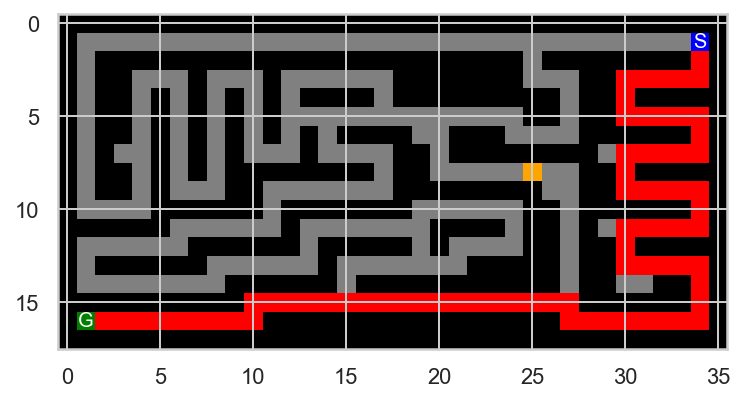

74


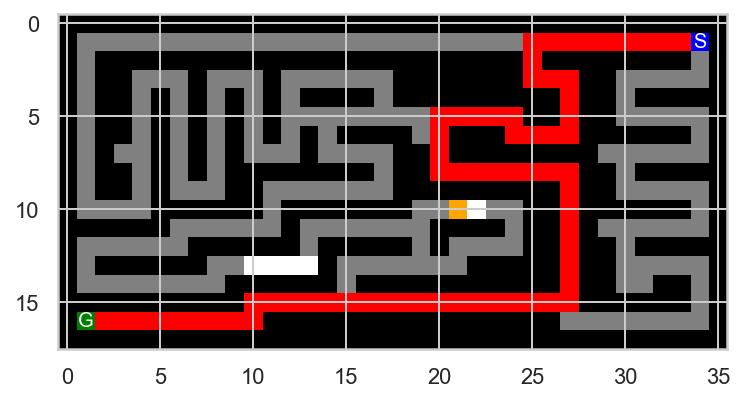

68

DFS


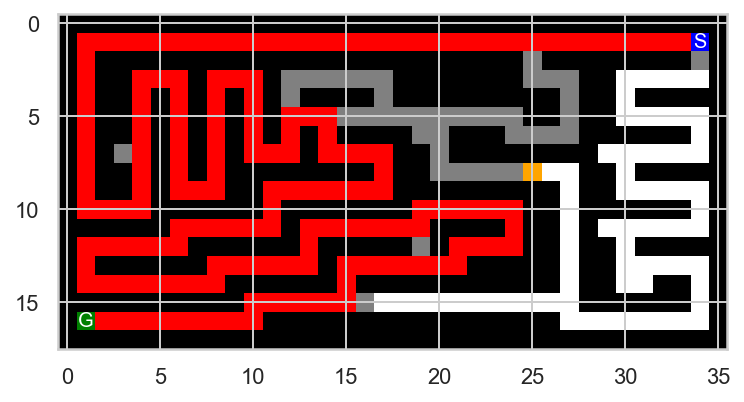

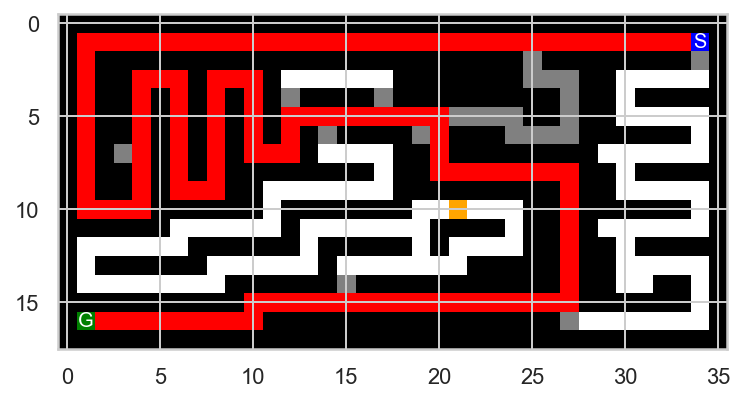


IDS


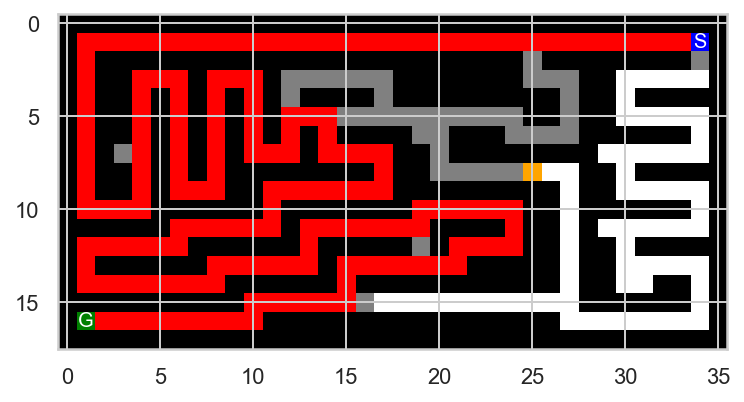

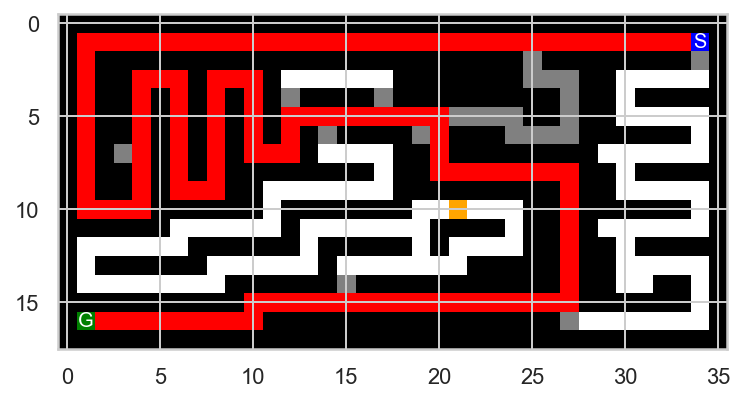

array([['X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
        'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
        'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X'],
       ['X', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
        'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P',
        'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'S', 'X'],
       ['X', 'P', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
        'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '.',
        'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '.', 'X'],
       ['X', 'P', 'X', 'X', 'P', 'P', 'P', 'X', 'P', 'P', 'P', 'X', ' ',
        ' ', ' ', ' ', ' ', ' ', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '.',
        '.', '.', 'X', 'X', ' ', ' ', ' ', ' ', ' ', 'X'],
       ['X', 'P', 'X', 'X', 'P', 'X', 'P', 'X', 'P', 'X', 'P', 'X', '.',
        'X', 'X', 'X', 'X', '.', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X',
        'X', '.', 'X', 'X', ' ', '

In [482]:
# Your code/answer goes here
print("BFS")
bfsNode = BFSBonus("medium_maze_goals_1.txt")
showmaze(printFinalPath(bfsNode[0], bfsNode[6]))
print(bfsNode[1])

bfsNode2 = BFSBonus("medium_maze_goals_2.txt")
showmaze(printFinalPath(bfsNode2[0], bfsNode2[6]))
print(bfsNode2[1])

print("\nDFS")
dfsNode = DFSBonus("medium_maze_goals_1.txt")
showmaze(printFinalPath(dfsNode[0], dfsNode[6]))

dfsNode2 = DFSBonus("medium_maze_goals_2.txt")
showmaze(printFinalPath(dfsNode2[0], dfsNode2[6]))

print("\nIDS")
idsNode = IDS("medium_maze_goals_1.txt")
showmaze(printFinalPath(idsNode[0], idsNode[6]))

idsNode2 = IDS("medium_maze_goals_2.txt")
showmaze(printFinalPath(idsNode2[0], idsNode2[6]))


## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [19]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [20]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [21]:
# Your code/answer goes here